In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define your base directory
MB_nrg_tutorial_dir= os.getcwd()

# tutorial_dir="bulk_water" 
tutorial_dir="ion_water"

base_dir= os.path.join(MB_nrg_tutorial_dir,tutorial_dir)

# Define different output file path
thermo_file_path = os.path.join(base_dir, 'thermo.out')

# Defination of different plotting functions

In [2]:
# Column names based on the required plots
required_columns = ['time', 'temp', 'pe',  'density', 'press']

# Function to load the data
def load_data(thermo_file_path):
    # Reading the data and assigning only necessary column names
    df = pd.read_csv(thermo_file_path, delim_whitespace=True, comment='#', header=None, usecols=[1, 2, 5, 7, 15])
    df.columns = required_columns
    return df

# Function to plot time vs. a specified column
def plot_time_vs_column(df, column_name, y_label, y_unit):
    plt.figure()
    plt.plot(df['time']/1e3, df[column_name], label=column_name)
    plt.xlabel('Time (ps)')
    plt.ylabel(f'{y_label} ({y_unit})')
    plt.title(f'Time vs {y_label}')
    plt.legend()
    plt.show()

In [3]:
def plot_water_rdf(file_path, expt_file_path, timestep, nbins=100):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Find the line with the specified timestep and number of bins
    start_line = 0
    for i, line in enumerate(lines):
        if line.startswith('#'):
            continue
        if str(timestep) in line.split() and str(nbins) in line.split():
            start_line = i + 1
            break
    
    # Read the data from the next 'nbins' lines
    rdf_data = []
    for line in lines[start_line:start_line + nbins]:
        if line.strip():  # Ignore empty lines
            rdf_data.append([float(x) for x in line.split()])
    
    # Convert to DataFrame
    df_rdf = pd.DataFrame(rdf_data)
    
    # Read the experimental RDF data
    df_expt_rdf = pd.read_csv(expt_file_path, delim_whitespace=True, header=None, names=['distance', 'g(r_OO)'])
    
    # Plot the RDF data (using only the 2nd and 3rd columns)
    plt.figure()
    plt.plot(df_rdf.iloc[:, 1], df_rdf.iloc[:, 2], label='Obtained')
    plt.xlabel('Distance (Å)')
    plt.xlim(0, 8)
    plt.ylim(0, 2.7)
    plt.ylabel(r'$g(r_{OO})$')

    # Plot experimental RDF with shading under the curve and no line
    plt.fill_between(df_expt_rdf['distance'], df_expt_rdf['g(r_OO)'], alpha=0.5, color='gray', label='Experimental')

    plt.legend()
    plt.show()

In [4]:
def plot_ion_rdf(file_path, timestep, nbins=100):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Find the line with the specified timestep and number of bins
    start_line = 0
    for i, line in enumerate(lines):
        if line.startswith('#'):
            continue
        if str(timestep) in line.split() and str(nbins) in line.split():
            start_line = i + 1
            break
    
    # Read the data from the next 'nbins' lines
    rdf_data = []
    for line in lines[start_line:start_line + nbins]:
        if line.strip():  # Ignore empty lines
            rdf_data.append([float(x) for x in line.split()])
    
    # Convert to DataFrame
    df_rdf = pd.DataFrame(rdf_data)
    
    
    # Plot the RDF data (using only the 2nd and 3rd columns)
    plt.figure()
    plt.plot(df_rdf.iloc[:, 1], df_rdf.iloc[:, 4], label='Obtained')
    plt.xlabel('Distance (Å)')
    plt.xlim(0, 8)
    # plt.ylim(0, 5)
    plt.ylabel(r'$g(r_{OO})$')

    plt.legend()
    plt.show()

In [5]:
def plot_msd_water(file_path):
    # Load the data, ignoring lines starting with #
    df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None)
    
    # Extracting the required columns
    time = df[0]/1e3 # fs to ps
    msd = df[4]
    
    # Plotting the data
    plt.figure()
    plt.plot(time, msd, label='Mean Square Displacement')
    plt.xlabel('Time (ps)')
    plt.ylabel('Mean Square Displacement (Å²)')
    plt.title('MSD of Water molecule')
    plt.legend()
    plt.show()
    
def plot_msd_ion(file_path):
    # Load the data, ignoring lines starting with #
    df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None)
    
    # Extracting the required columns
    time = df[0]/1e3 # fs to ps
    msd = df[4]
    
    # Plotting the data
    plt.figure()
    plt.plot(time, msd, label='Mean Square Displacement')
    plt.xlabel('Time (ps)')
    plt.xlim(time.min(), time.max())
    plt.ylabel('Mean Square Displacement (Å²)')
    plt.title('MSD of Ion molecule')
    plt.legend()
    plt.show()

In [6]:
def plot_MBnrg(file_path):
    # Load the data, ignoring lines starting with #
    df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None)
    
    # Extracting the first four columns
    df = df.iloc[:, :4]
    df.columns = ['time', 'e1bpip', 'e2bpip', 'e3bpip']
    
    # Plotting the data
    plt.figure()
    plt.plot(df['time']/1e3, df['e1bpip'], label='E1b_PIP')
    plt.plot(df['time']/1e3, df['e2bpip'], label='E2b_PIP')
    plt.plot(df['time']/1e3, df['e3bpip'], label='E3b_PIP')
    
    plt.xlabel('Time (ps)')
    plt.xlim(min(df['time']/1e3), max(df['time']/1e3))
    plt.ylabel('Energy (kcal/mol)')
    plt.title('PIP energies')
    plt.legend()
    plt.show()

# Plotting Different Thermodynamic Quantities

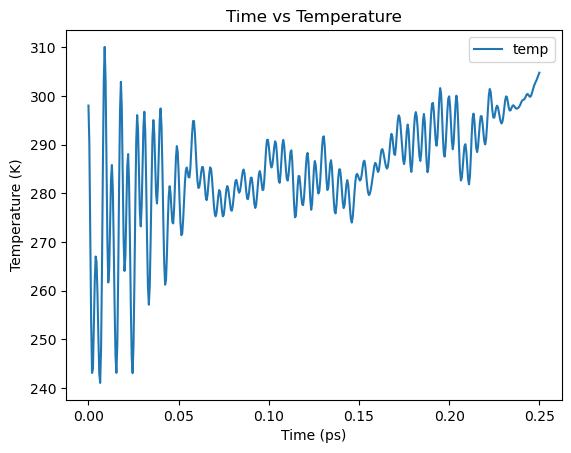

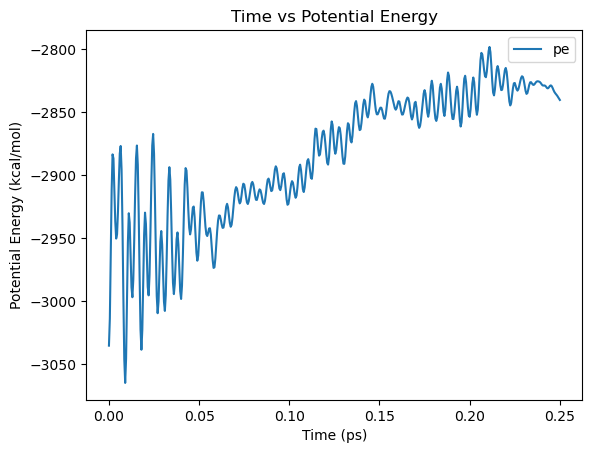

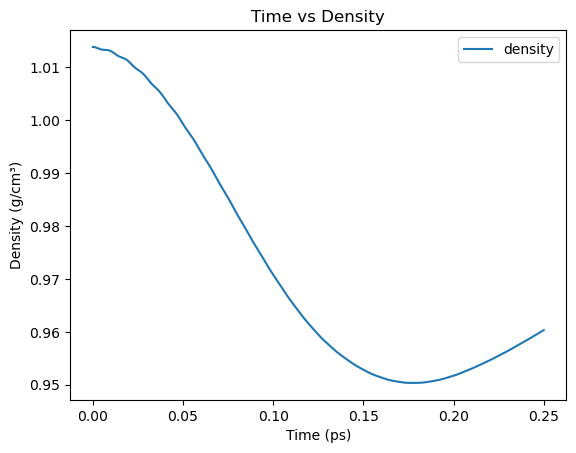

In [10]:
# Load the data
df = load_data(thermo_file_path)

# Plot time vs temp, pe, enthalpy, density
plot_time_vs_column(df, 'temp', 'Temperature', 'K')
plot_time_vs_column(df, 'pe', 'Potential Energy', 'kcal/mol')
plot_time_vs_column(df, 'density', 'Density', 'g/cm³')

In [21]:
analyse_dir=os.path.join(base_dir,"analyse_traj")

rdf_file_path = os.path.join(analyse_dir, 'rdf.out')
expt_rdf_file_path = os.path.join(MB_nrg_tutorial_dir,"OwOw_expt.rdf")
water_msd_file = os.path.join(analyse_dir, 'water_msd.out')  
ion_msd_file = os.path.join(analyse_dir, 'na_msd.out')
mbx_out_file = os.path.join(base_dir, 'mbx_thermo.out') 

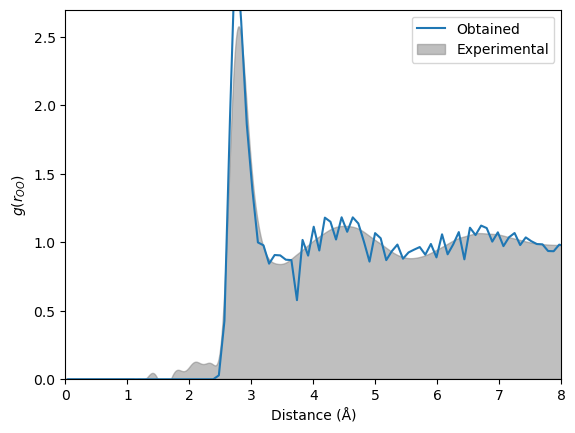

In [14]:
plot_water_rdf(rdf_file_path, expt_rdf_file_path,timestep=100)

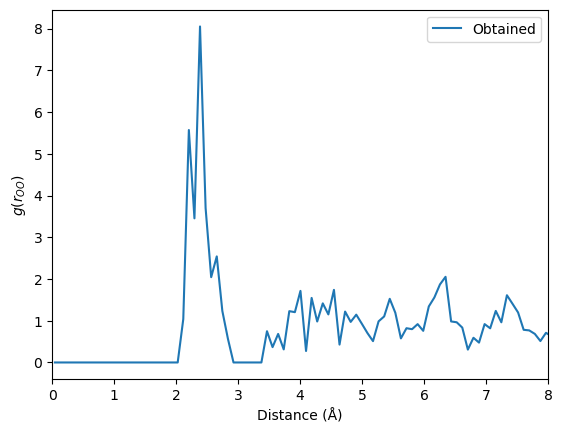

In [17]:
plot_ion_rdf(rdf_file_path,timestep=500)

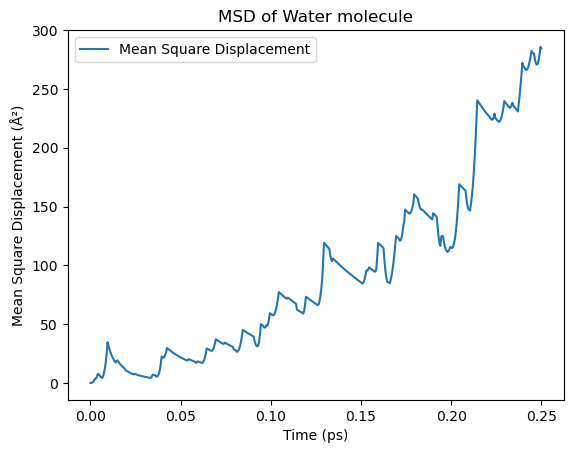

In [18]:
plot_msd_water(water_msd_file)

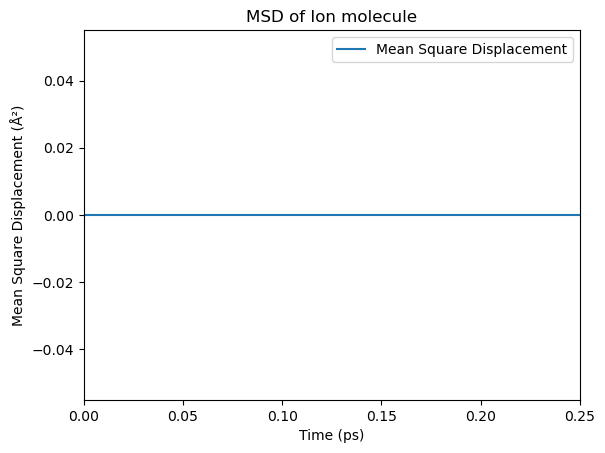

In [19]:
plot_msd_ion(ion_msd_file)

# MB-nrg Analysis

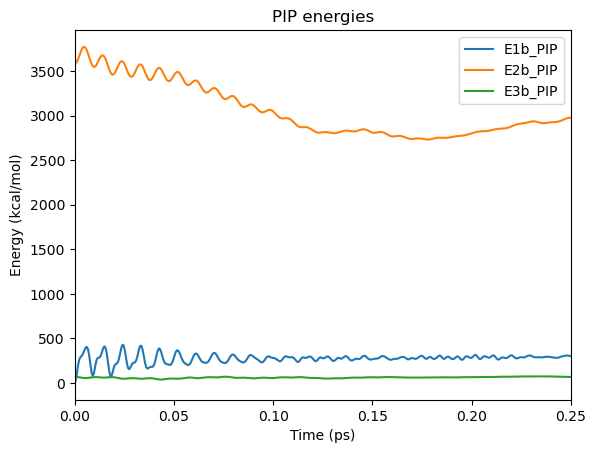

In [22]:
plot_MBnrg(mbx_out_file)

# Plotting Equilibrated Trajectory

In [7]:
eq_dir=os.path.join(base_dir,"analyse_equilibriated_traj")

thermo_file_path = os.path.join(eq_dir, 'thermo.out')
rdf_file_path = os.path.join(eq_dir, 'rdf.out')
expt_rdf_file_path = os.path.join(MB_nrg_tutorial_dir,"OwOw_expt.rdf")
water_msd_file = os.path.join(eq_dir, 'water_msd.out')  
ion_msd_file = os.path.join(eq_dir, 'na_msd.out')
mbx_out_file = os.path.join(eq_dir, 'mbx_thermo.out') 

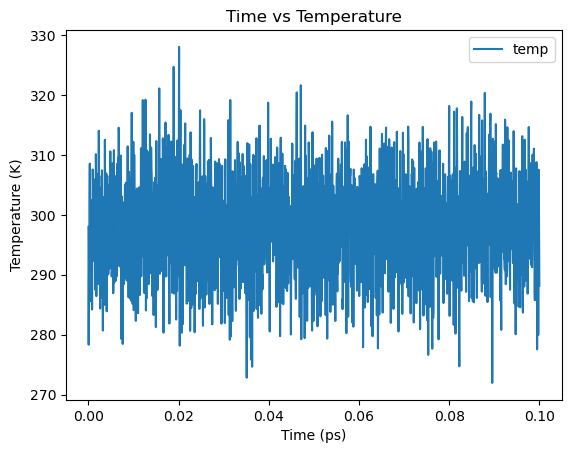

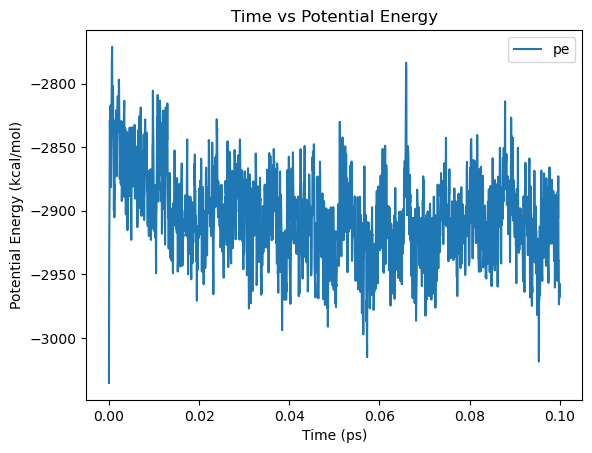

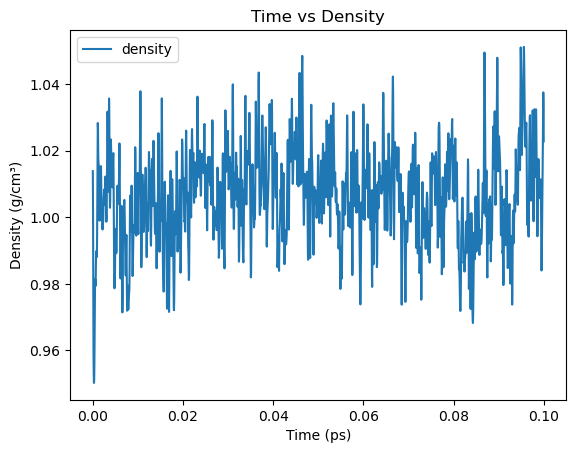

In [8]:
# Load the data
df = load_data(thermo_file_path)

# Plot time vs temp, pe, enthalpy, density
plot_time_vs_column(df, 'temp', 'Temperature', 'K')
plot_time_vs_column(df, 'pe', 'Potential Energy', 'kcal/mol')
plot_time_vs_column(df, 'density', 'Density', 'g/cm³')

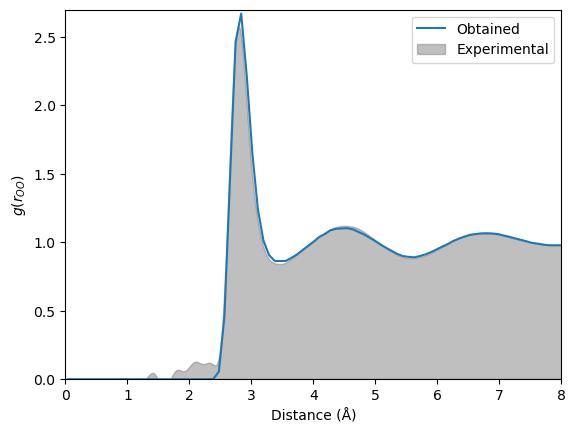

In [9]:
plot_water_rdf(rdf_file_path, expt_rdf_file_path,timestep=200000)

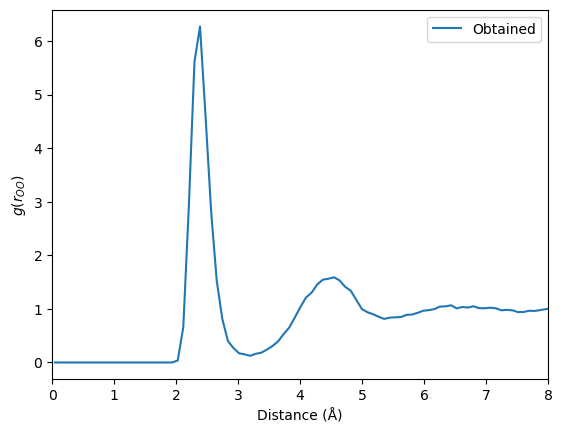

In [10]:
plot_ion_rdf(rdf_file_path,timestep=200000)

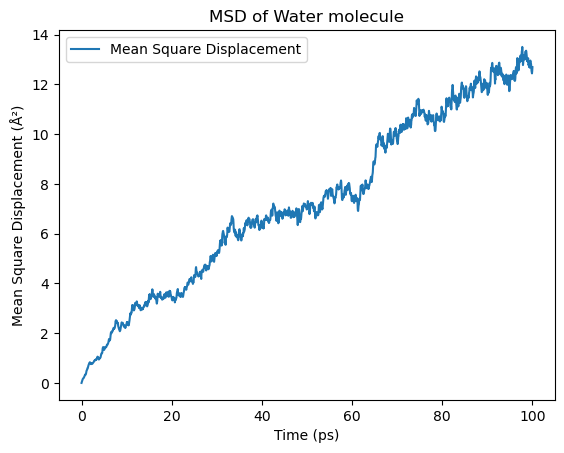

In [11]:
plot_msd_water(water_msd_file)

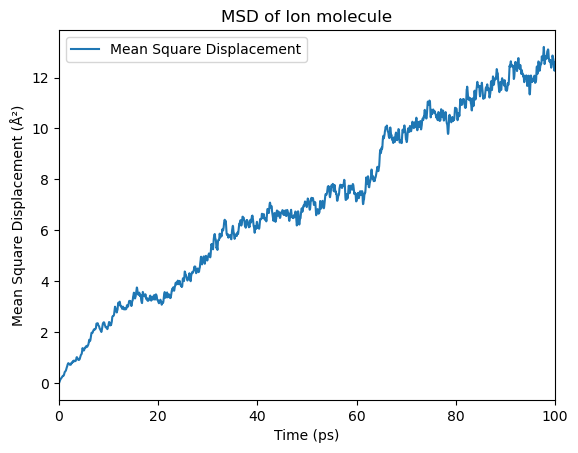

In [12]:
# Run only for ion_water folder
plot_msd_ion(ion_msd_file)

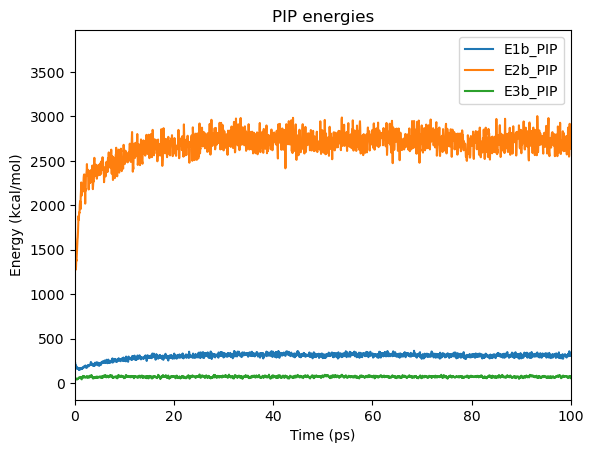

In [33]:
plot_MBnrg(mbx_out_file)